In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\Dhanvantari.ai\models\Heart\data\heart (1).csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.shape

(918, 12)

## Data Preprocessing

In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [10]:
cat_col=df.select_dtypes(include='object').columns
print(cat_col)

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [11]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

## Converting Categorical Variables to Numeric

In [12]:
for col in cat_col:
    print(col)
    print((df[col].unique()),list(range(df[col].nunique())))
    df[col].replace((df[col].unique()),range(df[col].nunique()), inplace = True)
    print()

Sex
['M' 'F'] [0, 1]

ChestPainType
['ATA' 'NAP' 'ASY' 'TA'] [0, 1, 2, 3]

RestingECG
['Normal' 'ST' 'LVH'] [0, 1, 2]

ExerciseAngina
['N' 'Y'] [0, 1]

ST_Slope
['Up' 'Flat' 'Down'] [0, 1, 2]



C:\Users\Nived\AppData\Local\Temp\ipykernel_41604\268260659.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace((df[col].unique()),range(df[col].nunique()), inplace = True)
C:\Users\Nived\AppData\Local\Temp\ipykernel_41604\268260659.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
 

In [13]:
print(df)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              0        140          289          0           0   
1     49    1              1        160          180          0           0   
2     37    0              0        130          283          0           1   
3     48    1              2        138          214          0           0   
4     54    0              1        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              3        110          264          0           0   
914   68    0              2        144          193          1           0   
915   57    0              2        130          131          0           0   
916   57    1              0        130          236          0           2   
917   38    0              1        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Hear

In [14]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

## Imputing the 0 values in Cholestrol column with KNN Imputer

In [15]:
np.nan

nan

In [16]:
df['Cholesterol'].replace(0, np.nan, inplace=True)

C:\Users\Nived\AppData\Local\Temp\ipykernel_41604\4255682910.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cholesterol'].replace(0, np.nan, inplace=True)


In [17]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
after_impute = imputer.fit_transform(df)
df = pd.DataFrame(after_impute, columns=df.columns)

In [18]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,0.0,0.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0,0.0
1,49.0,1.0,1.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0,1.0
2,37.0,0.0,0.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0,0.0
3,48.0,1.0,2.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,1.0,1.0
4,54.0,0.0,1.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,0.0,3.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,1.0,1.0
914,68.0,0.0,2.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,1.0,1.0
915,57.0,0.0,2.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,1.0,1.0
916,57.0,1.0,0.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,1.0,1.0


In [19]:
count = 0
for i in df['Cholesterol']:
    if i == 0:
        count += 1
print(count)

0


In [20]:
df['RestingBP'][df['RestingBP']==0]

449    0.0
Name: RestingBP, dtype: float64

In [21]:
df['RestingBP'].replace(0, np.nan, inplace=True)
imputer = KNNImputer(n_neighbors=3)
after_impute = imputer.fit_transform(df)
df = pd.DataFrame(after_impute, columns=df.columns)

C:\Users\Nived\AppData\Local\Temp\ipykernel_41604\306302018.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RestingBP'].replace(0, np.nan, inplace=True)


In [22]:
df['RestingBP'].unique()

array([140., 160., 130., 138., 150., 120., 110., 136., 115., 100., 124.,
       113., 125., 145., 112., 132., 118., 170., 142., 190., 135., 180.,
       108., 155., 128., 106.,  92., 200., 122.,  98., 105., 133.,  95.,
        80., 137., 185., 165., 126., 152., 116., 144., 154., 134., 104.,
       139., 131., 141., 178., 146., 158., 123., 102.,  96., 143., 172.,
       156., 114., 127., 101., 174.,  94., 148., 117., 192., 129., 164.])

In [23]:
df['RestingBP'].isnull().sum()

np.int64(0)

## Change Column Type to Int

In [24]:
withoutOldPeak = df.columns
withOutPeak = withoutOldPeak.drop('Oldpeak')
df[withoutOldPeak] = df[withoutOldPeak].astype('int32')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             918 non-null    int32
 1   Sex             918 non-null    int32
 2   ChestPainType   918 non-null    int32
 3   RestingBP       918 non-null    int32
 4   Cholesterol     918 non-null    int32
 5   FastingBS       918 non-null    int32
 6   RestingECG      918 non-null    int32
 7   MaxHR           918 non-null    int32
 8   ExerciseAngina  918 non-null    int32
 9   Oldpeak         918 non-null    int32
 10  ST_Slope        918 non-null    int32
 11  HeartDisease    918 non-null    int32
dtypes: int32(12)
memory usage: 43.2 KB


In [26]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import plotly.express as px

In [28]:
df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
524,55,0,2,150,160,0,1,150,0,0,0,0


In [29]:
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055750,0.214164,0.263128,0.057108,0.198039,0.213152,-0.382045,0.215793,0.222111,0.268264,0.282039
Sex,-0.055750,1.000000,-0.179766,-0.009658,0.080395,-0.120076,0.018343,0.189186,-0.190664,-0.107969,-0.150693,-0.305445
ChestPainType,0.214164,-0.179766,1.000000,0.073016,0.038855,0.155111,0.112067,-0.273076,0.324049,0.278211,0.352364,0.459017
RestingBP,0.263128,-0.009658,0.073016,1.000000,0.113194,0.067556,0.094144,-0.109329,0.152621,0.165713,0.082401,0.118333
Cholesterol,0.057108,0.080395,0.038855,0.113194,1.000000,0.058798,0.074925,-0.028855,0.083761,0.063703,0.071345,0.101263
FastingBS,0.198039,-0.120076,0.155111,0.067556,0.058798,1.000000,0.050707,-0.131438,0.060451,0.041421,0.175774,0.267291
RestingECG,0.213152,0.018343,0.112067,0.094144,0.074925,0.050707,1.000000,0.048552,0.036119,0.084853,0.078807,0.061011
MaxHR,-0.382045,0.189186,-0.273076,-0.109329,-0.028855,-0.131438,0.048552,1.000000,-0.370425,-0.165156,-0.343419,-0.400421
ExerciseAngina,0.215793,-0.190664,0.324049,0.152621,0.083761,0.060451,0.036119,-0.370425,1.000000,0.396723,0.428706,0.494282
Oldpeak,0.222111,-0.107969,0.278211,0.165713,0.063703,0.041421,0.084853,-0.165156,0.396723,1.000000,0.488129,0.392385


In [30]:
import plotly.express as px

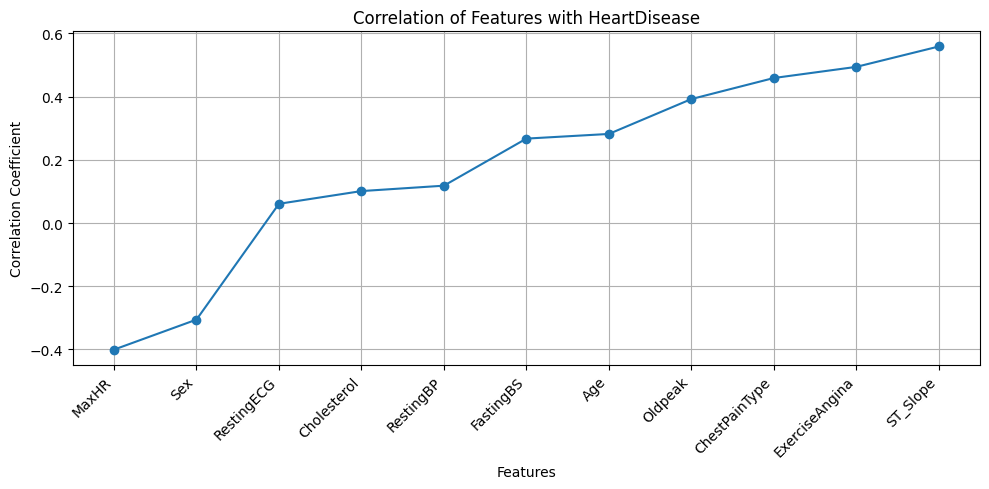

In [31]:
corr_series = df.corr()['HeartDisease'][:-1].sort_values()

plt.figure(figsize=(10, 5))

plt.plot(
    corr_series.index,
    corr_series.values,
    marker='o',
    linestyle='-'
)

plt.title("Correlation of Features with HeartDisease")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")

plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.tight_layout()
plt.show()

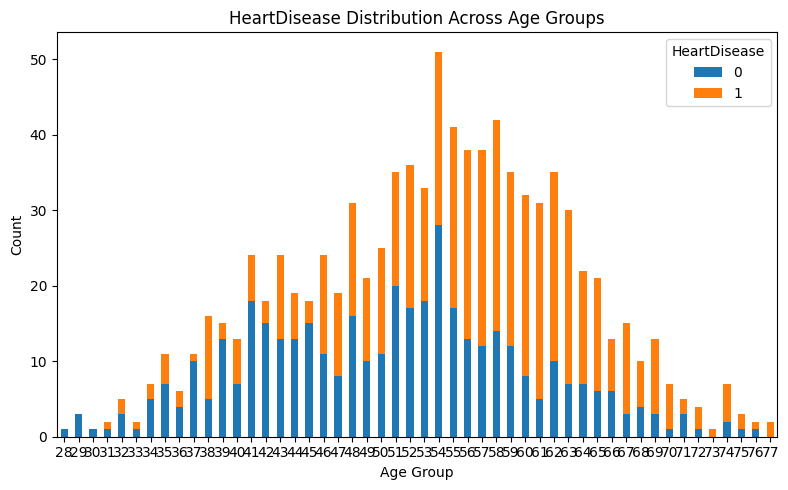

In [32]:
import matplotlib.pyplot as plt

age_hd = pd.crosstab(df['Age'], df['HeartDisease'])

age_hd.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5)
)

plt.title('HeartDisease Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


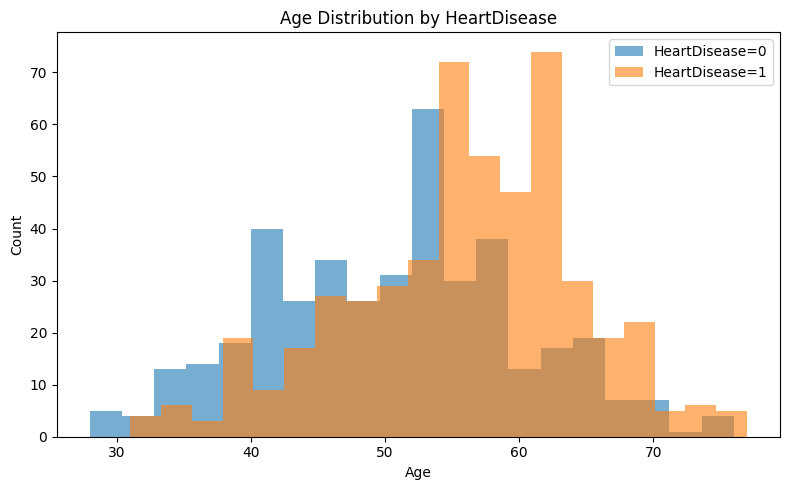

In [33]:
plt.figure(figsize=(8,5))

for hd in df['HeartDisease'].unique():
    subset = df[df['HeartDisease'] == hd]
    plt.hist(subset['Age'], bins=20, alpha=0.6, label=f'HeartDisease={hd}')

plt.title('Age Distribution by HeartDisease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

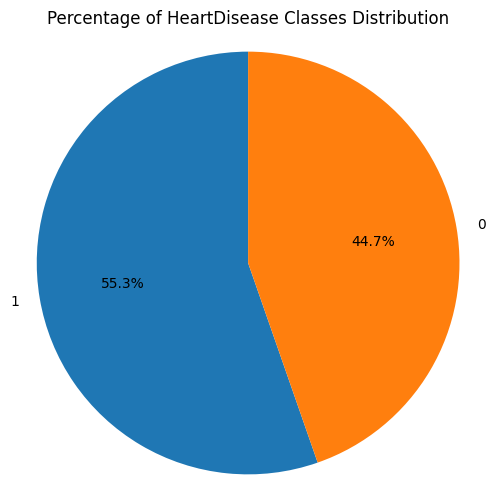

In [34]:
counts = df['HeartDisease'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Percentage of HeartDisease Classes Distribution')
plt.axis('equal')
plt.show()

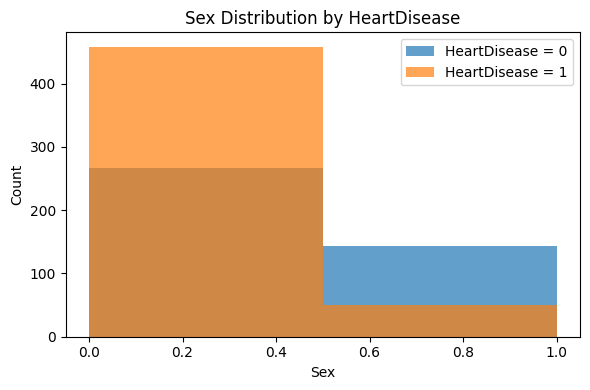

In [35]:
plt.figure(figsize=(6, 4))

for hd in df['HeartDisease'].unique():
    subset = df[df['HeartDisease'] == hd]
    plt.hist(
        subset['Sex'],
        bins=len(df['Sex'].unique()),
        alpha=0.7,
        label=f'HeartDisease = {hd}'
    )

plt.title('Sex Distribution by HeartDisease')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

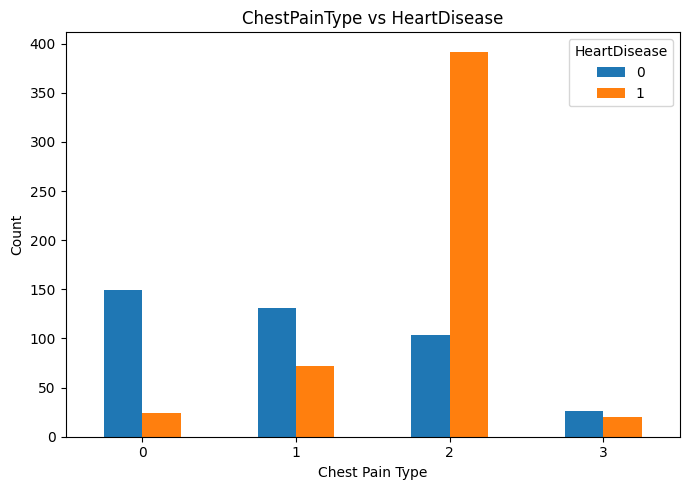

In [36]:
cp_hd = pd.crosstab(df['ChestPainType'], df['HeartDisease'])

cp_hd.plot(
    kind='bar',
    figsize=(7,5)
)

plt.title('ChestPainType vs HeartDisease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='HeartDisease')
plt.tight_layout()
plt.show()

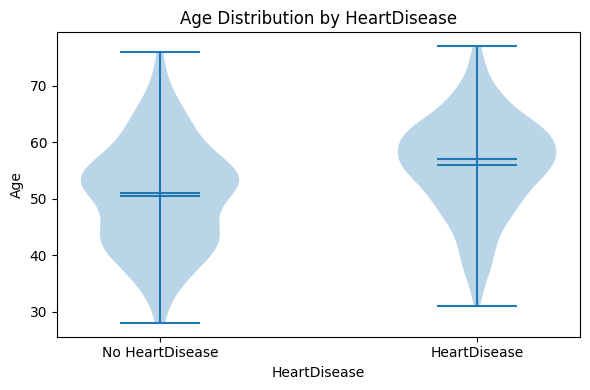

In [39]:
hd_0 = df[df['HeartDisease'] == 0]['Age']
hd_1 = df[df['HeartDisease'] == 1]['Age']

plt.figure(figsize=(6,4))

plt.violinplot(
    [hd_0, hd_1],
    showmeans=True,
    showmedians=True
)

plt.xticks([1, 2], ['No HeartDisease', 'HeartDisease'])
plt.xlabel('HeartDisease')
plt.ylabel('Age')
plt.title('Age Distribution by HeartDisease')

plt.tight_layout()
plt.show()

## Machine Learning

In [40]:
from sklearn.model_selection import train_test_split
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [41]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'sag']
best_solver = ''
test_score = np.zeros(6)
for i,n in enumerate(solver):
    lr = LogisticRegression(solver=n).fit(X_train, y_train)
    test_score[i] = lr.score(X_test, y_test)
    if lr.score(X_test, y_test) == test_score.max():
        best_solver = n
lr = LogisticRegression(solver=best_solver)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(f"LogisticRegression score: {accuracy_score(y_test, lr_pred)}")

LogisticRegression score: 0.8586956521739131


C:\Users\Nived\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nived\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Nived\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

In [42]:
# Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

kernels = {'linear':0, 'poly':0, 'rbf':0, 'sigmoid':0}
best=""
for i in kernels:
    svm = SVC(kernel=i)
    svm.fit(X_train, y_train)
    yhat = svm.predict(X_test)
    kernels[i]=f1_score(y_test, yhat,average='weighted')
    if kernels[i] == max(kernels.values()):
        best=i
svm=SVC(kernel=best)
svm.fit(X_train, y_train)
svm_pred=svm.predict(X_test)
print(f"SVM f1_score kernel({best}): {f1_score(y_test, svm_pred, average='weighted')}")
print(f"SVM accuracy_score: {accuracy_score(y_test, svm_pred)}")

SVM f1_score kernel(linear): 0.8476254501300231
SVM accuracy_score: 0.8478260869565217


In [43]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3,4,5,6,7,8],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3,4],
    'random_state': [0,42]
}
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
Ctree = DecisionTreeClassifier(**grid_search.best_params_, class_weight='balanced')
Ctree.fit(X_train, y_train)
dtc_pred =Ctree.predict(X_test)
print("DecisionTrees Accuracy: ", accuracy_score(y_test, dtc_pred))

DecisionTrees Accuracy:  0.8097826086956522


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize model
rfc = RandomForestClassifier()

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9, 19],
    'max_leaf_nodes': [3, 6, 9],
}

# Grid Search
grid_search = GridSearchCV(rfc, param_grid)
grid_search.fit(X_train, y_train)

# Best model
rfctree = RandomForestClassifier(**grid_search.best_params_)
rfctree.fit(X_train, y_train)

# Prediction
rfc_pred = rfctree.predict(X_test)

# Accuracy
print("RandomForestClassifier's Accuracy:", accuracy_score(y_test, rfc_pred))


RandomForestClassifier's Accuracy: 0.8315217391304348
